<a href="https://colab.research.google.com/github/yonk069/Portfoli0/blob/main/NHC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt


Files found: 8
/content/drive/MyDrive/aadhaar_project/aadhaar_master_FINAL_part_1.csv
/content/drive/MyDrive/aadhaar_project/aadhaar_master_FINAL_part_2.csv
/content/drive/MyDrive/aadhaar_project/aadhaar_master_FINAL_part_3.csv
/content/drive/MyDrive/aadhaar_project/aadhaar_master_FINAL_part_4.csv
/content/drive/MyDrive/aadhaar_project/aadhaar_master_FINAL_part_5.csv
/content/drive/MyDrive/aadhaar_project/aadhaar_master_FINAL_part_6.csv
/content/drive/MyDrive/aadhaar_project/aadhaar_master_FINAL_part_7.csv
/content/drive/MyDrive/aadhaar_project/aadhaar_master_FINAL_part_8.csv


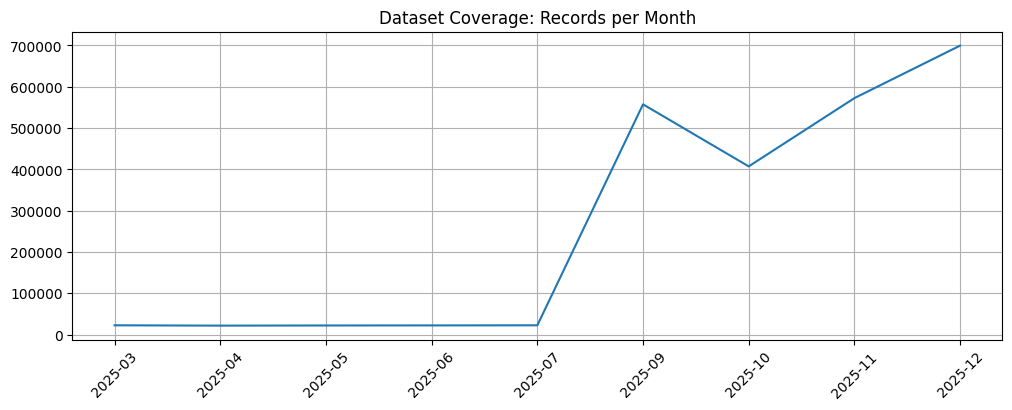

Merged dataset shape: (2346664, 20)


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,demo_age_5_17,demo_age_17_,bio_age_5_17,bio_age_17_,enrol_total,demo_total,bio_total,updates_total,updates_per_enrol,demo_share,bio_share,updates_z,month
0,2025-03-01,Andaman & Nicobar Islands,Andamans,744101.0,0.0,0.0,0.0,0.0,0.0,16.0,193.0,0.0,0.0,209.0,209.0,NaN,0.000000,1.000000,4.315400,2025-03
1,2025-03-01,Andaman and Nicobar Islands,Nicobar,744301.0,0.0,0.0,0.0,16.0,180.0,101.0,48.0,0.0,196.0,149.0,345.0,NaN,0.568116,0.431884,8.625001,2025-03
2,2025-03-01,Andaman and Nicobar Islands,Nicobar,744302.0,0.0,0.0,0.0,0.0,0.0,15.0,12.0,0.0,0.0,27.0,27.0,NaN,0.000000,1.000000,2.603284,2025-03
3,2025-03-01,Andaman and Nicobar Islands,Nicobar,744303.0,0.0,0.0,0.0,0.0,0.0,46.0,27.0,0.0,0.0,73.0,73.0,NaN,0.000000,1.000000,2.477380,2025-03
4,2025-03-01,Andaman and Nicobar Islands,Nicobar,744304.0,0.0,0.0,0.0,0.0,0.0,16.0,14.0,0.0,0.0,30.0,30.0,NaN,0.000000,1.000000,1.384760,2025-03


In [23]:


DATA_PATH = "/content/drive/MyDrive/aadhaar_project"
files = sorted(glob.glob(f"{DATA_PATH}/aadhaar_master_FINAL_part_*.csv"))

print("Files found:", len(files))
print(*files, sep="\n")

df = pd.concat([pd.read_csv(f, low_memory=False) for f in files], ignore_index=True)

df["date"] = pd.to_datetime(df["date"], errors="coerce")
df = df.dropna(subset=["date"])

df["month"] = df["date"].dt.to_period("M").astype(str)

monthly_rows = df.groupby("month").size().reset_index(name="rows")

plt.figure(figsize=(12,4))
plt.plot(monthly_rows["month"], monthly_rows["rows"])
plt.xticks(rotation=45)
plt.title("Dataset Coverage: Records per Month")
plt.grid(True)
plt.show()

print("Merged dataset shape:", df.shape)
df.head()


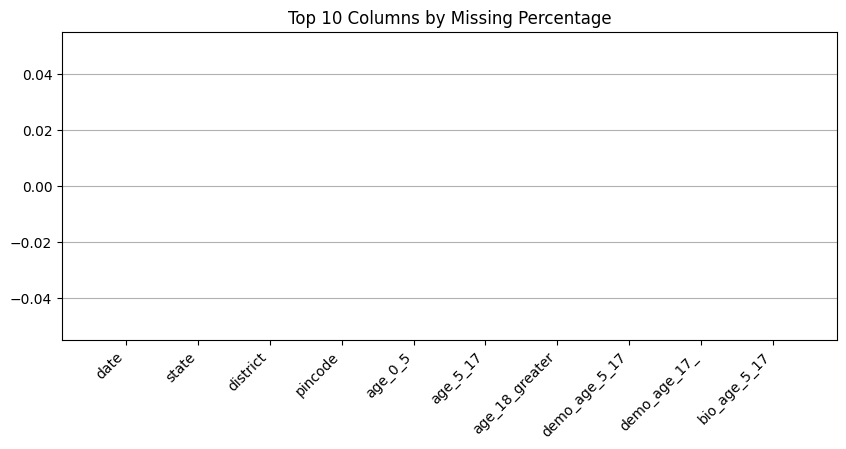

,0
date,0.0
state,0.0
district,0.0
pincode,0.0
age_0_5,0.0
age_5_17,0.0
age_18_greater,0.0
demo_age_5_17,0.0
demo_age_17_,0.0
bio_age_5_17,0.0


In [24]:

num_cols = df.select_dtypes(include=["number"]).columns
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce").fillna(0)


missing_pct = (df.isna().mean() * 100).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,4))
plt.bar(missing_pct.index, missing_pct.values)
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Columns by Missing Percentage")
plt.grid(True, axis="y")
plt.show()

missing_pct


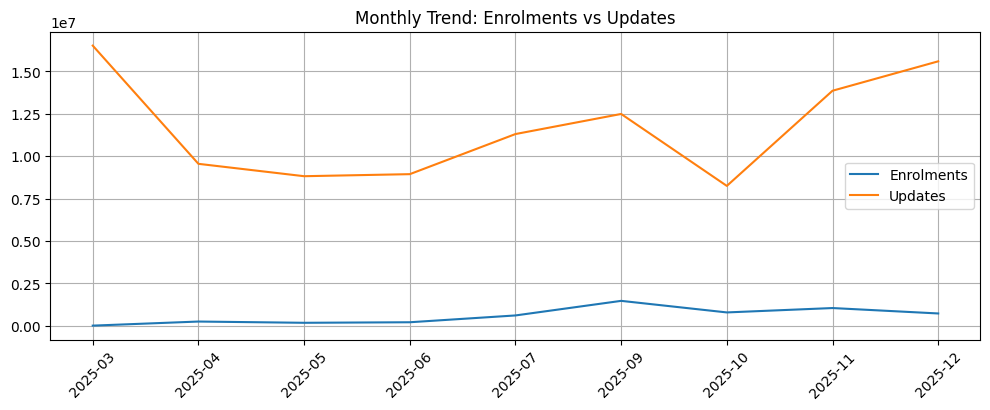

In [25]:
df["enrol_total"] = df["age_0_5"] + df["age_5_17"] + df["age_18_greater"]
df["demo_total"] = df["demo_age_5_17"] + df["demo_age_17_"]
df["bio_total"]  = df["bio_age_5_17"] + df["bio_age_17_"]
df["updates_total"] = df["demo_total"] + df["bio_total"]

df["updates_per_enrol"] = df["updates_total"] / df["enrol_total"].replace(0, np.nan)
df["demo_share"] = df["demo_total"] / df["updates_total"].replace(0, np.nan)
df["bio_share"]  = df["bio_total"] / df["updates_total"].replace(0, np.nan)

monthly_kpi = df.groupby("month")[["enrol_total","updates_total"]].sum().reset_index()

plt.figure(figsize=(12,4))
plt.plot(monthly_kpi["month"], monthly_kpi["enrol_total"], label="Enrolments")
plt.plot(monthly_kpi["month"], monthly_kpi["updates_total"], label="Updates")
plt.xticks(rotation=45)
plt.title("Monthly Trend: Enrolments vs Updates")
plt.legend()
plt.grid(True)
plt.show()


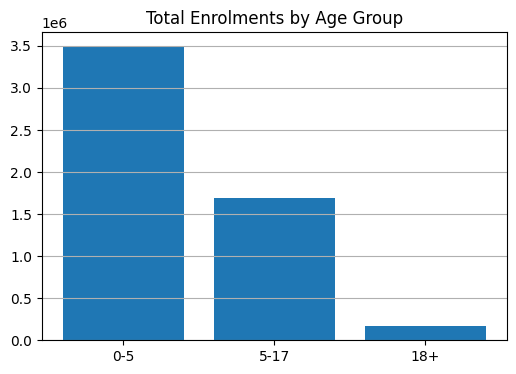

{'0-5': np.float64(3486582.0),
 '5-17': np.float64(1693641.0),
 '18+': np.float64(166508.0)}

In [26]:
age_totals = {
    "0-5": df["age_0_5"].sum(),
    "5-17": df["age_5_17"].sum(),
    "18+": df["age_18_greater"].sum()
}

plt.figure(figsize=(6,4))
plt.bar(age_totals.keys(), age_totals.values())
plt.title("Total Enrolments by Age Group")
plt.grid(True, axis="y")
plt.show()

age_totals

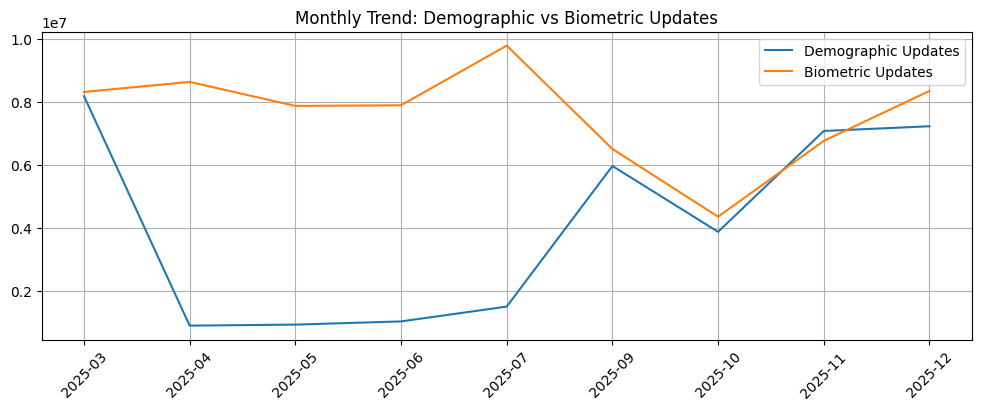

In [27]:
monthly_updates = df.groupby("month")[["demo_total","bio_total"]].sum().reset_index()

plt.figure(figsize=(12,4))
plt.plot(monthly_updates["month"], monthly_updates["demo_total"], label="Demographic Updates")
plt.plot(monthly_updates["month"], monthly_updates["bio_total"], label="Biometric Updates")
plt.xticks(rotation=45)
plt.title("Monthly Trend: Demographic vs Biometric Updates")
plt.legend()
plt.grid(True)
plt.show()


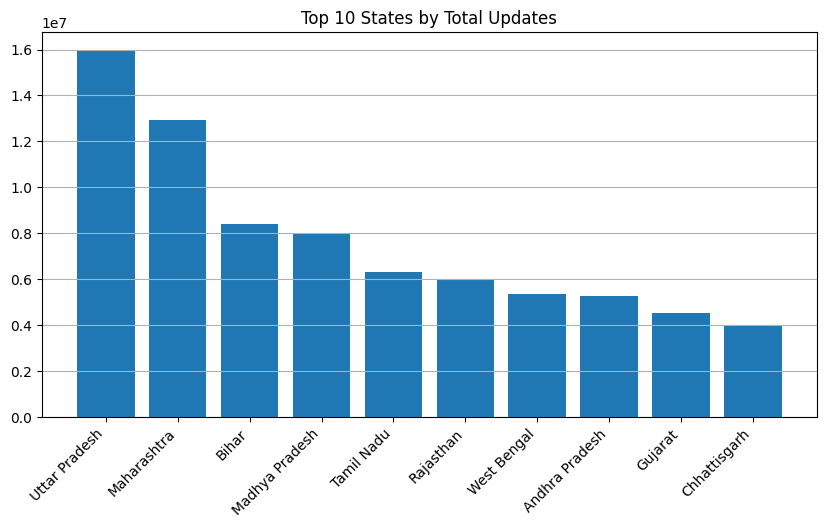

,updates_total
state,
Uttar Pradesh,15970488.0
Maharashtra,12925702.0
Bihar,8417812.0
Madhya Pradesh,7944561.0
Tamil Nadu,6330336.0
Rajasthan,6011315.0
West Bengal,5350957.0
Andhra Pradesh,5252826.0
Gujarat,4506003.0


In [28]:
state_rank = df.groupby("state")["updates_total"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(state_rank.index, state_rank.values)
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 States by Total Updates")
plt.grid(True, axis="y")
plt.show()

state_rank


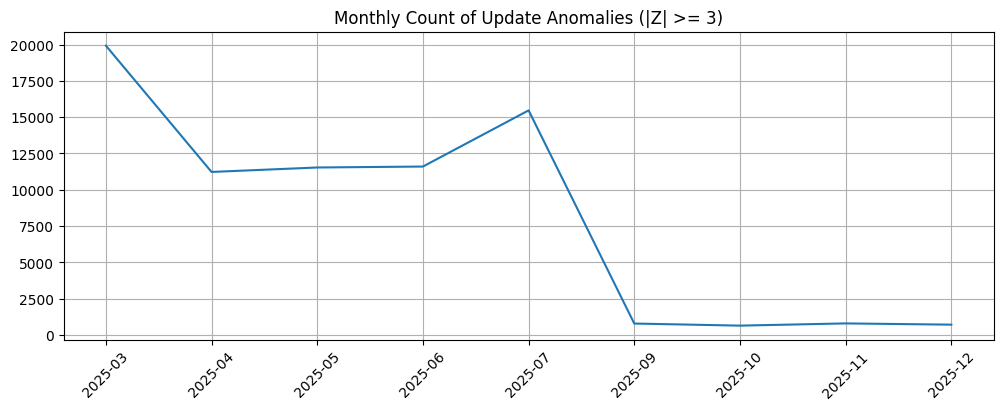

,date,state,district,pincode,updates_total,updates_z
69788,2025-06-01,Chhattisgarh,Balrampur,497225.0,11210.0,9.978726
14282,2025-03-01,Rajasthan,Baran,325221.0,8943.0,9.945621
14270,2025-03-01,Rajasthan,Banswara,327801.0,10423.0,9.848062
2563,2025-03-01,Assam,South Salmara Mankachar,783128.0,1045.0,9.818730
69957,2025-06-01,Chhattisgarh,Kondagaon,494226.0,22031.0,9.811181
14260,2025-03-01,Rajasthan,Banswara,327027.0,3783.0,9.783993
14321,2025-03-01,Rajasthan,Bharatpur,321202.0,1885.0,9.783088
19993,2025-03-01,Uttar Pradesh,Maharajganj,273164.0,6279.0,9.735478
14709,2025-03-01,Rajasthan,Jhalawar,326039.0,4536.0,9.728344
14261,2025-03-01,Rajasthan,Banswara,327031.0,6325.0,9.708854


In [29]:
def zscore(series):
    std = series.std(ddof=0)
    if std == 0:
        return series * 0
    return (series - series.mean()) / std

df["updates_z"] = df.groupby(["state","district","pincode"])["updates_total"].transform(zscore)
df["anomaly_flag"] = (df["updates_z"].abs() >= 3).astype(int)

anomaly_monthly = df.groupby("month")["anomaly_flag"].sum().reset_index()

plt.figure(figsize=(12,4))
plt.plot(anomaly_monthly["month"], anomaly_monthly["anomaly_flag"])
plt.xticks(rotation=45)
plt.title("Monthly Count of Update Anomalies (|Z| >= 3)")
plt.grid(True)
plt.show()

# show top spikes
top_spikes = df[df["updates_total"] > 0].nlargest(10, "updates_z")
top_spikes[["date","state","district","pincode","updates_total","updates_z"]]


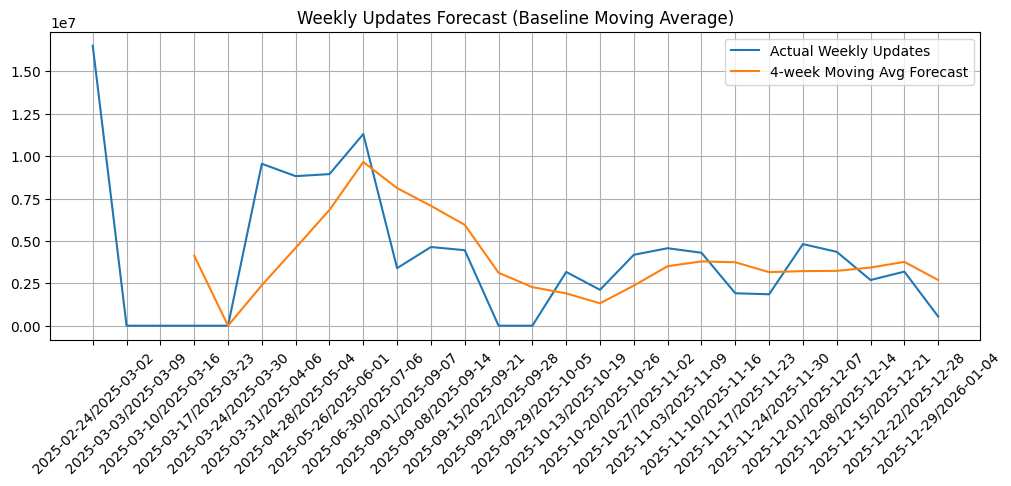

In [30]:
df["week"] = df["date"].dt.to_period("W").astype(str)

weekly = df.groupby("week")["updates_total"].sum().reset_index()
weekly["ma4"] = weekly["updates_total"].rolling(4).mean()

plt.figure(figsize=(12,4))
plt.plot(weekly["week"], weekly["updates_total"], label="Actual Weekly Updates")
plt.plot(weekly["week"], weekly["ma4"], label="4-week Moving Avg Forecast")
plt.xticks(rotation=45)
plt.title("Weekly Updates Forecast (Baseline Moving Average)")
plt.legend()
plt.grid(True)
plt.show()


In [31]:
OUT_PATH = "/content/drive/MyDrive/aadhaar_project/outputs"
os.makedirs(OUT_PATH, exist_ok=True)

df.to_csv(f"{OUT_PATH}/aadhaar_clean_kpis_anomalies.csv", index=False)
weekly.to_csv(f"{OUT_PATH}/weekly_updates_forecast_ready.csv", index=False)

print("Saved outputs to:", OUT_PATH)


Saved outputs to: /content/drive/MyDrive/aadhaar_project/outputs


In [32]:
import pandas as pd
import numpy as np

df["week"] = df["date"].dt.to_period("W").astype(str)

weekly_state = (
    df.groupby(["week","state"])[["updates_total","demo_total","bio_total","enrol_total"]]
    .sum()
    .reset_index()
)

# Convert week into a sortable datetime
weekly_state["week_start"] = pd.to_datetime(weekly_state["week"].str.split("/").str[0])
weekly_state = weekly_state.sort_values(["state","week_start"])

weekly_state.head()


,week,state,updates_total,demo_total,bio_total,enrol_total,week_start
252,2025-09-01/2025-09-07,100000,0.0,0.0,0.0,4.0,2025-09-01
307,2025-09-08/2025-09-14,100000,0.0,0.0,0.0,6.0,2025-09-08
363,2025-09-15/2025-09-21,100000,0.0,0.0,0.0,2.0,2025-09-15
557,2025-10-20/2025-10-26,100000,0.0,0.0,0.0,1.0,2025-10-20
717,2025-11-10/2025-11-16,100000,0.0,0.0,0.0,5.0,2025-11-10


In [33]:
for lag in [1,2,3,4]:
    weekly_state[f"lag_{lag}"] = weekly_state.groupby("state")["updates_total"].shift(lag)

weekly_state["rolling_4"] = (
    weekly_state.groupby("state")["updates_total"]
    .shift(1)
    .rolling(4)
    .mean()
    .reset_index(level=0, drop=True)
)

model_df = weekly_state.dropna().copy()
model_df.head()


,week,state,updates_total,demo_total,bio_total,enrol_total,week_start,lag_1,lag_2,lag_3,lag_4,rolling_4
717,2025-11-10/2025-11-16,100000,0.0,0.0,0.0,5.0,2025-11-10,0.0,0.0,0.0,0.0,4.50
988,2025-12-15/2025-12-21,100000,1.0,1.0,0.0,161.0,2025-12-15,0.0,0.0,0.0,0.0,56663.25
1045,2025-12-22/2025-12-28,100000,1.0,1.0,0.0,17.0,2025-12-22,1.0,0.0,0.0,0.0,6.25
1104,2025-12-29/2026-01-04,100000,0.0,0.0,0.0,12.0,2025-12-29,1.0,1.0,0.0,0.0,3.25
208,2025-06-30/2025-07-06,Andaman & Nicobar Islands,259.0,0.0,259.0,0.0,2025-06-30,140.0,180.0,184.0,209.0,17.25


In [34]:
cutoff = model_df["week_start"].quantile(0.85)

train = model_df[model_df["week_start"] <= cutoff]
test  = model_df[model_df["week_start"] > cutoff]

features = [f"lag_{i}" for i in [1,2,3,4]] + ["rolling_4"]

X_train = train[features]
y_train = train["updates_total"]

X_test = test[features]
y_test = test["updates_total"]

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (650, 5)
Test shape: (77, 5)


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

model = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

pred = model.predict(X_test)

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 32374.09870129871
RMSE: 61841.38807924103


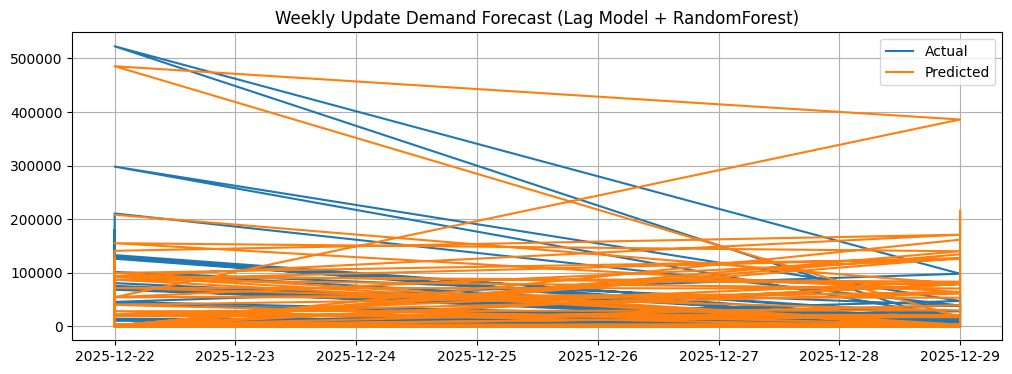

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(test["week_start"], y_test.values, label="Actual")
plt.plot(test["week_start"], pred, label="Predicted")
plt.title("Weekly Update Demand Forecast (Lag Model + RandomForest)")
plt.legend()
plt.grid(True)
plt.show()


In [37]:
top_states = (
    weekly_state.groupby("state")["updates_total"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top_states


,updates_total
state,
Uttar Pradesh,15970488.0
Maharashtra,12925702.0
Bihar,8417812.0
Madhya Pradesh,7944561.0
Tamil Nadu,6330336.0


STATE: Uttar Pradesh
MAE: 277434.5577777778


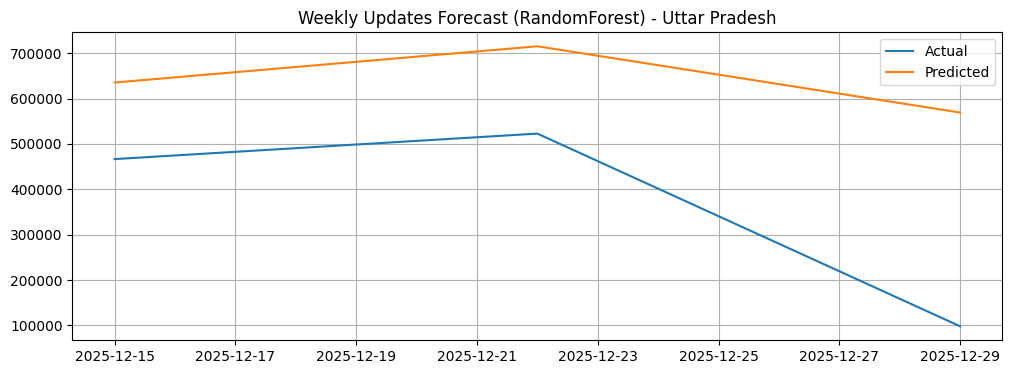

In [38]:
STATE = top_states.index[0]

one = model_df[model_df["state"] == STATE].copy()

cutoff = one["week_start"].quantile(0.85)
train_one = one[one["week_start"] <= cutoff]
test_one  = one[one["week_start"] > cutoff]

features = [f"lag_{i}" for i in [1,2,3,4]] + ["rolling_4"]

X_train = train_one[features]
y_train = train_one["updates_total"]

X_test = test_one[features]
y_test = test_one["updates_total"]

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

m = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
m.fit(X_train, y_train)

pred = m.predict(X_test)

print("STATE:", STATE)
print("MAE:", mean_absolute_error(y_test, pred))

import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(test_one["week_start"], y_test.values, label="Actual")
plt.plot(test_one["week_start"], pred, label="Predicted")
plt.title(f"Weekly Updates Forecast (RandomForest) - {STATE}")
plt.legend()
plt.grid(True)
plt.show()


In [39]:
state_updates = df.groupby("state")["updates_total"].sum().sort_values(ascending=False).head(10)
state_updates


,updates_total
state,
Uttar Pradesh,15970488.0
Maharashtra,12925702.0
Bihar,8417812.0
Madhya Pradesh,7944561.0
Tamil Nadu,6330336.0
Rajasthan,6011315.0
West Bengal,5350957.0
Andhra Pradesh,5252826.0
Gujarat,4506003.0


In [40]:
district_updates = (
    df.groupby(["state","district"])["updates_total"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)
district_updates


state        district         
Maharashtra  Pune                 923970.0
             Thane                892288.0
             Nashik               756668.0
Gujarat      Ahmedabad            597441.0
Rajasthan    Jaipur               545695.0
Delhi        North West Delhi     537158.0
Gujarat      Surat                533922.0
Maharashtra  Ahmadnagar           531762.0
             Solapur              530565.0
             Jalgaon              526369.0
West Bengal  South 24 Parganas    522123.0
Maharashtra  Nanded               516165.0
Karnataka    Bengaluru            515449.0
Maharashtra  Mumbai               499536.0
West Bengal  Murshidabad          480875.0
Name: updates_total, dtype: float64

In [41]:
anomaly_rate = (
    df.groupby(["state","district","pincode"])["anomaly_flag"]
    .mean()
    .sort_values(ascending=False)
    .head(15)
)
anomaly_rate


,,,anomaly_flag
state,district,pincode,
Kerala,Thiruvananthapuram,695034.0,0.111111
Odisha,Anugul,759104.0,0.105263
Bihar,Patna,811302.0,0.105263
Andaman & Nicobar Islands,South Andaman,744102.0,0.100000
Chhattisgarh,Baloda Bazar,493445.0,0.100000
Tamil Nadu,Tirunelveli,627551.0,0.100000
Bihar,Purnia,854312.0,0.100000
Chhattisgarh,Mungeli,495004.0,0.100000
Uttar Pradesh,Hathras,281301.0,0.100000


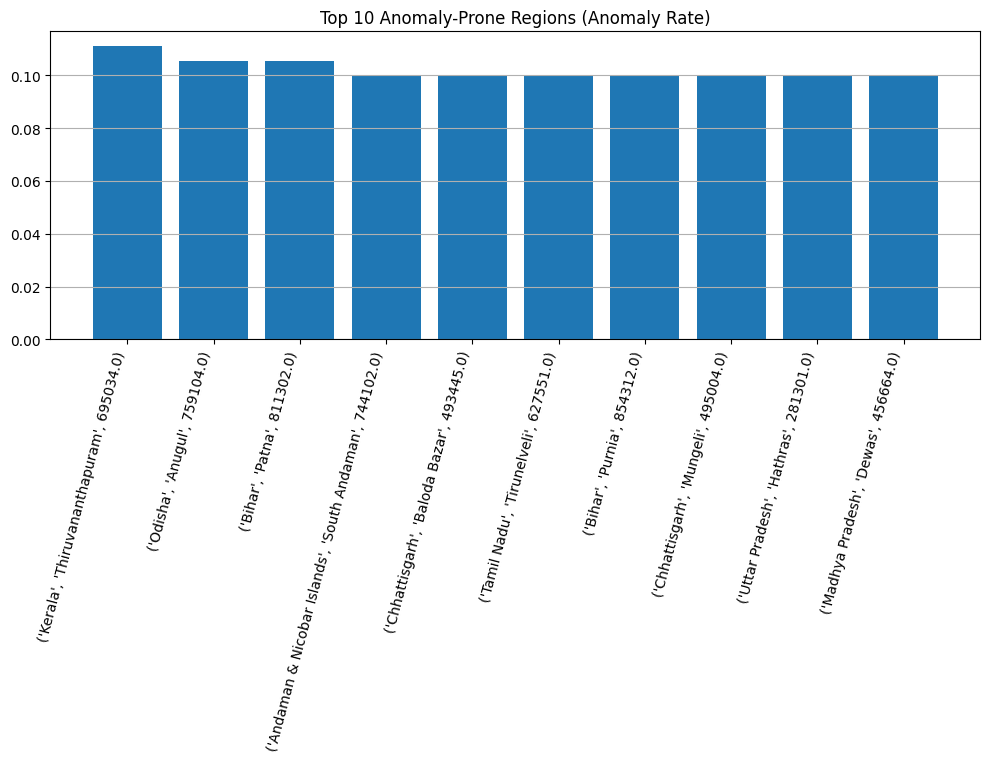

In [42]:
top_anom = anomaly_rate.head(10)

plt.figure(figsize=(12,4))
plt.bar(range(len(top_anom)), top_anom.values)
plt.xticks(range(len(top_anom)), [str(x) for x in top_anom.index], rotation=75, ha="right")
plt.title("Top 10 Anomaly-Prone Regions (Anomaly Rate)")
plt.grid(True, axis="y")
plt.show()


In [43]:
import numpy as np

mape = np.mean(np.abs((y_test - pred) / (y_test + 1))) * 100
print("STATE:", STATE)
print("MAE:", mean_absolute_error(y_test, pred))
print("MAPE (%):", mape)


STATE: Uttar Pradesh
MAE: 277434.5577777778
MAPE (%): 184.44641879676692


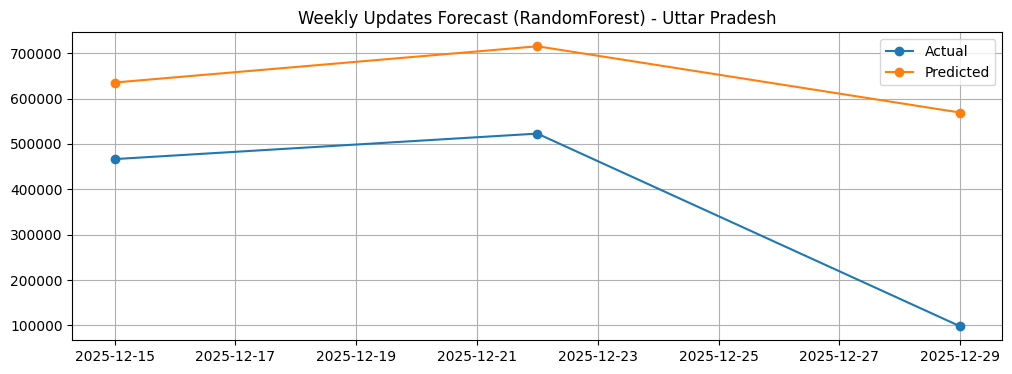

In [44]:
plt.figure(figsize=(12,4))
plt.plot(test_one["week_start"], y_test.values, marker="o", label="Actual")
plt.plot(test_one["week_start"], pred, marker="o", label="Predicted")
plt.title(f"Weekly Updates Forecast (RandomForest) - {STATE}")
plt.legend()
plt.grid(True)
plt.show()


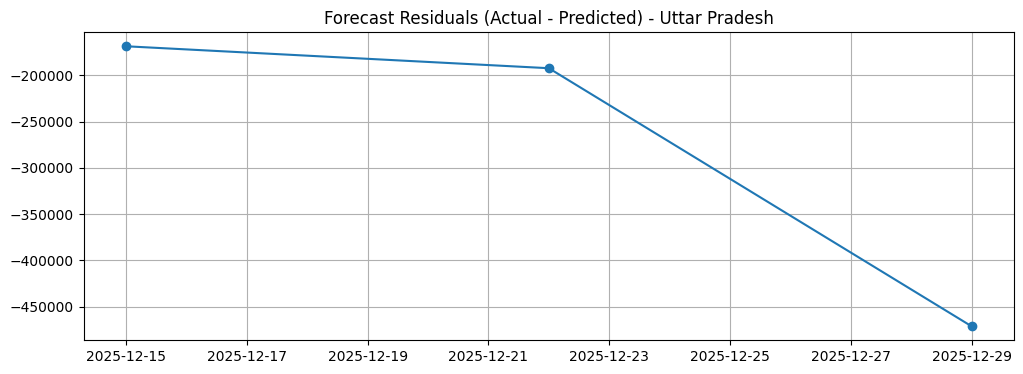

In [45]:
residuals = y_test.values - pred

plt.figure(figsize=(12,4))
plt.plot(test_one["week_start"], residuals, marker="o")
plt.title(f"Forecast Residuals (Actual - Predicted) - {STATE}")
plt.grid(True)
plt.show()


In [46]:
district_features = df.groupby(["state","district"]).agg(
    enrol_total=("enrol_total","sum"),
    updates_total=("updates_total","sum"),
    demo_total=("demo_total","sum"),
    bio_total=("bio_total","sum"),
    anomaly_rate=("anomaly_flag","mean")
).reset_index()

district_features["churn_index"] = district_features["updates_total"] / (district_features["enrol_total"] + 1)
district_features["demo_share"] = district_features["demo_total"] / (district_features["updates_total"] + 1)
district_features["bio_share"]  = district_features["bio_total"] / (district_features["updates_total"] + 1)

district_features.head()


,state,district,enrol_total,updates_total,demo_total,bio_total,anomaly_rate,churn_index,demo_share,bio_share
0,100000,100000,214.0,2.0,2.0,0.0,0.086957,0.009302,0.666667,0.000000
1,Andaman & Nicobar Islands,Andamans,73.0,2490.0,555.0,1935.0,0.013699,33.648649,0.222802,0.776796
2,Andaman & Nicobar Islands,Nicobars,1.0,5.0,3.0,2.0,0.000000,2.500000,0.500000,0.333333
3,Andaman & Nicobar Islands,South Andaman,37.0,560.0,236.0,324.0,0.011858,14.736842,0.420677,0.577540
4,Andaman and Nicobar Islands,Nicobar,74.0,2255.0,500.0,1755.0,0.022727,30.066667,0.221631,0.777926


In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = district_features[["updates_total","churn_index","demo_share","bio_share","anomaly_rate"]].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
district_features["cluster"] = kmeans.fit_predict(X_scaled)

district_features["cluster"].value_counts()


,count
cluster,
0,573
1,273
2,208
4,75
3,4


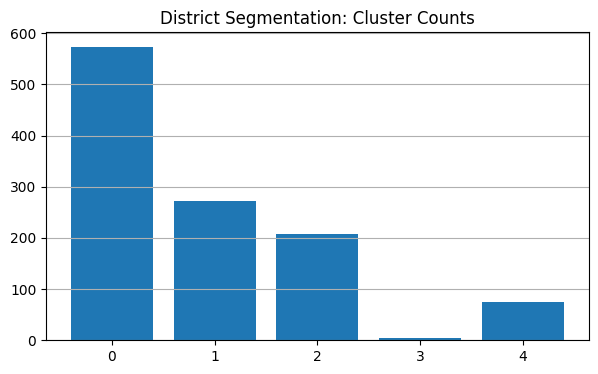

In [48]:
cluster_counts = district_features["cluster"].value_counts().sort_index()

plt.figure(figsize=(7,4))
plt.bar(cluster_counts.index.astype(str), cluster_counts.values)
plt.title("District Segmentation: Cluster Counts")
plt.grid(True, axis="y")
plt.show()


In [49]:
cluster_profile = district_features.groupby("cluster")[[
    "updates_total","churn_index","demo_share","bio_share","anomaly_rate"
]].mean().round(3)

cluster_profile


,updates_total,churn_index,demo_share,bio_share,anomaly_rate
cluster,,,,,
0,71039.679,26.300,0.301,0.698,0.031
1,14099.733,16.572,0.620,0.328,0.013
2,292043.034,25.375,0.365,0.635,0.031
3,675.500,482.667,0.556,0.442,0.002
4,2.960,1.640,0.076,0.318,0.000


In [50]:
import numpy as np

def smape(y_true, y_pred):
    return 100 * np.mean(
        2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1)
    )

print("sMAPE (%):", smape(y_test.values, pred))


sMAPE (%): 67.64493845261987


In [51]:
y_train_log = np.log1p(y_train)
y_test_log  = np.log1p(y_test)

m2 = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
m2.fit(X_train, y_train_log)

pred_log = m2.predict(X_test)
pred2 = np.expm1(pred_log)

from sklearn.metrics import mean_absolute_error
print("MAE (log model):", mean_absolute_error(y_test, pred2))
print("sMAPE (log model):", smape(y_test.values, pred2))


MAE (log model): 311190.6720486231
sMAPE (log model): 107.85326765502627


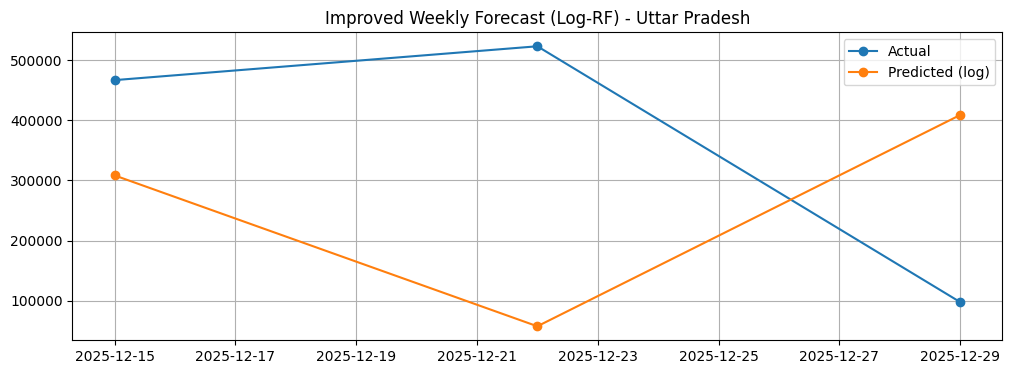

In [52]:
plt.figure(figsize=(12,4))
plt.plot(test_one["week_start"], y_test.values, marker="o", label="Actual")
plt.plot(test_one["week_start"], pred2, marker="o", label="Predicted (log)")
plt.title(f"Improved Weekly Forecast (Log-RF) - {STATE}")
plt.legend()
plt.grid(True)
plt.show()


In [53]:
STATE = "Uttar Pradesh"

df_state = df[df["state"] == STATE].copy()
df_state["week"] = df_state["date"].dt.to_period("W").astype(str)
df_state["week_start"] = pd.to_datetime(df_state["week"].str.split("/").str[0])

weekly_up = (
    df_state.groupby(["week","week_start"])
    .agg(
        updates_total=("updates_total","sum"),
        anomaly_events=("anomaly_flag","sum"),
        demo_total=("demo_total","sum"),
        bio_total=("bio_total","sum"),
        enrol_total=("enrol_total","sum")
    )
    .reset_index()
    .sort_values("week_start")
)

weekly_up.head()


,week,week_start,updates_total,anomaly_events,demo_total,bio_total,enrol_total
0,2025-02-24/2025-03-02,2025-02-24,2750863.0,1762,1619359.0,1131504.0,0.0
1,2025-03-03/2025-03-09,2025-03-03,0.0,0,0.0,0.0,1113.0
2,2025-03-10/2025-03-16,2025-03-10,0.0,0,0.0,0.0,1604.0
3,2025-03-17/2025-03-23,2025-03-17,0.0,0,0.0,0.0,1756.0
4,2025-03-24/2025-03-30,2025-03-24,0.0,0,0.0,0.0,920.0


In [54]:
for lag in [1,2,3,4]:
    weekly_up[f"lag_{lag}"] = weekly_up["updates_total"].shift(lag)

weekly_up["rolling_4"] = weekly_up["updates_total"].shift(1).rolling(4).mean()
weekly_up["anom_lag1"] = weekly_up["anomaly_events"].shift(1)

weekly_up_model = weekly_up.dropna().copy()
weekly_up_model.head()


,week,week_start,updates_total,anomaly_events,demo_total,bio_total,enrol_total,lag_1,lag_2,lag_3,lag_4,rolling_4,anom_lag1
4,2025-03-24/2025-03-30,2025-03-24,0.0,0,0.0,0.0,920.0,0.0,0.0,0.0,2750863.0,687715.75,0.0
5,2025-03-31/2025-04-06,2025-03-31,1363154.0,900,105706.0,1257448.0,57903.0,0.0,0.0,0.0,0.0,0.00,0.0
6,2025-04-28/2025-05-04,2025-04-28,1156609.0,544,107731.0,1048878.0,49861.0,1363154.0,0.0,0.0,0.0,340788.50,900.0
7,2025-05-26/2025-06-01,2025-05-26,938834.0,237,82379.0,856455.0,48753.0,1156609.0,1363154.0,0.0,0.0,629940.75,544.0
8,2025-06-30/2025-07-06,2025-06-30,1645132.0,1386,219131.0,1426001.0,157866.0,938834.0,1156609.0,1363154.0,0.0,864649.25,237.0


In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

cutoff = weekly_up_model["week_start"].quantile(0.85)
train = weekly_up_model[weekly_up_model["week_start"] <= cutoff]
test  = weekly_up_model[weekly_up_model["week_start"] > cutoff]

features = [f"lag_{i}" for i in [1,2,3,4]] + ["rolling_4", "anom_lag1"]

X_train = train[features]
y_train = train["updates_total"]

X_test = test[features]
y_test = test["updates_total"]

m = RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1)
m.fit(X_train, y_train)

pred = m.predict(X_test)

print("MAE (event-aware):", mean_absolute_error(y_test, pred))

def smape(y_true, y_pred):
    return 100 * np.mean(
        2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1)
    )

print("sMAPE (event-aware):", smape(y_test.values, pred))


MAE (event-aware): 171851.123125
sMAPE (event-aware): 44.45686291415847


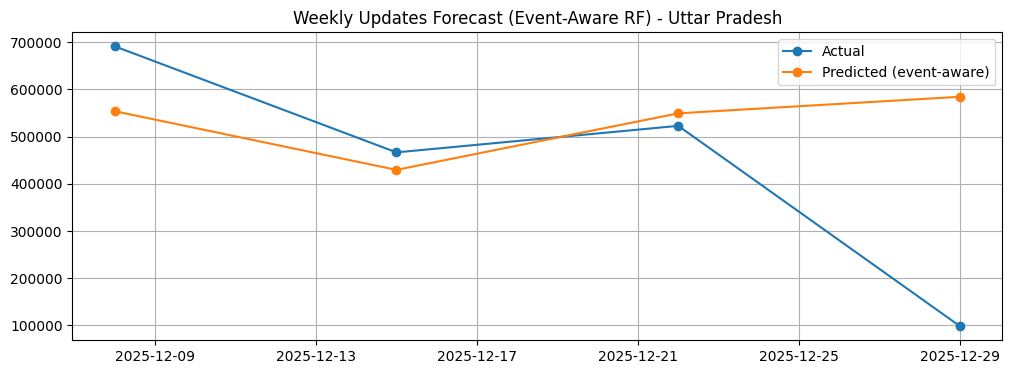

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(test["week_start"], y_test.values, marker="o", label="Actual")
plt.plot(test["week_start"], pred, marker="o", label="Predicted (event-aware)")
plt.title(f"Weekly Updates Forecast (Event-Aware RF) - {STATE}")
plt.legend()
plt.grid(True)
plt.show()


In [57]:
import pandas as pd

imp = pd.Series(m.feature_importances_, index=features).sort_values(ascending=False)
imp


,0
lag_4,0.363906
rolling_4,0.140675
lag_1,0.130416
lag_3,0.126774
lag_2,0.126029
anom_lag1,0.112198


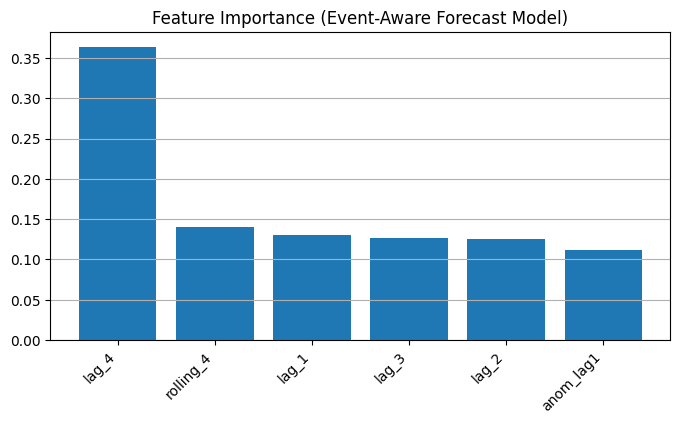

In [58]:
plt.figure(figsize=(8,4))
plt.bar(imp.index, imp.values)
plt.xticks(rotation=45, ha="right")
plt.title("Feature Importance (Event-Aware Forecast Model)")
plt.grid(True, axis="y")
plt.show()


In [59]:
top_states = df.groupby("state")["updates_total"].sum().sort_values(ascending=False).head(10)
top_states


,updates_total
state,
Uttar Pradesh,15970488.0
Maharashtra,12925702.0
Bihar,8417812.0
Madhya Pradesh,7944561.0
Tamil Nadu,6330336.0
Rajasthan,6011315.0
West Bengal,5350957.0
Andhra Pradesh,5252826.0
Gujarat,4506003.0


In [60]:
top_districts = (
    df.groupby(["state","district"])["updates_total"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)
top_districts


state        district         
Maharashtra  Pune                 923970.0
             Thane                892288.0
             Nashik               756668.0
Gujarat      Ahmedabad            597441.0
Rajasthan    Jaipur               545695.0
Delhi        North West Delhi     537158.0
Gujarat      Surat                533922.0
Maharashtra  Ahmadnagar           531762.0
             Solapur              530565.0
             Jalgaon              526369.0
West Bengal  South 24 Parganas    522123.0
Maharashtra  Nanded               516165.0
Karnataka    Bengaluru            515449.0
Maharashtra  Mumbai               499536.0
West Bengal  Murshidabad          480875.0
Name: updates_total, dtype: float64

In [61]:
anomaly_hotspots = (
    df.groupby(["state","district","pincode"])["anomaly_flag"]
    .mean()
    .sort_values(ascending=False)
    .head(15)
)
anomaly_hotspots


,,,anomaly_flag
state,district,pincode,
Kerala,Thiruvananthapuram,695034.0,0.111111
Odisha,Anugul,759104.0,0.105263
Bihar,Patna,811302.0,0.105263
Andaman & Nicobar Islands,South Andaman,744102.0,0.100000
Chhattisgarh,Baloda Bazar,493445.0,0.100000
Tamil Nadu,Tirunelveli,627551.0,0.100000
Bihar,Purnia,854312.0,0.100000
Chhattisgarh,Mungeli,495004.0,0.100000
Uttar Pradesh,Hathras,281301.0,0.100000


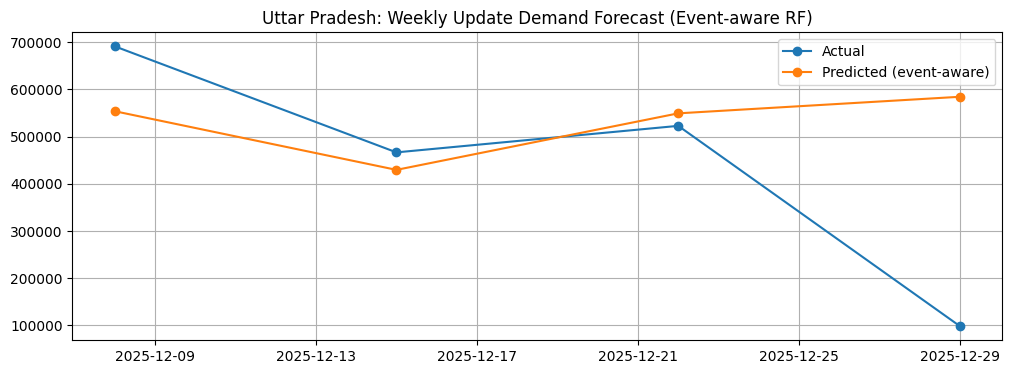

In [62]:
plt.figure(figsize=(12,4))
plt.plot(test["week_start"], y_test.values, marker="o", label="Actual")
plt.plot(test["week_start"], pred, marker="o", label="Predicted (event-aware)")
plt.title("Uttar Pradesh: Weekly Update Demand Forecast (Event-aware RF)")
plt.legend()
plt.grid(True)
plt.show()


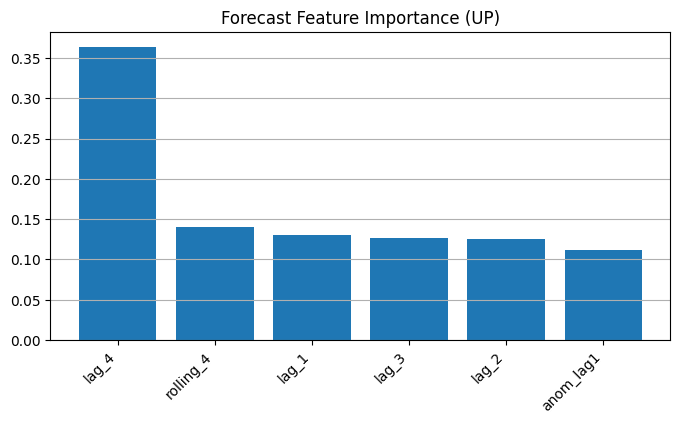

In [63]:
import pandas as pd

imp = pd.Series(m.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(8,4))
plt.bar(imp.index, imp.values)
plt.xticks(rotation=45, ha="right")
plt.title("Forecast Feature Importance (UP)")
plt.grid(True, axis="y")
plt.show()


In [64]:
OUT_PATH = "/content/drive/MyDrive/aadhaar_project/outputs"
os.makedirs(OUT_PATH, exist_ok=True)

# Save forecast results
forecast_out = test[["week","week_start"]].copy()
forecast_out["actual_updates"] = y_test.values
forecast_out["predicted_updates"] = pred
forecast_out.to_csv(f"{OUT_PATH}/up_event_aware_forecast.csv", index=False)

# Save district clusters
district_features.to_csv(f"{OUT_PATH}/district_segmentation_clusters.csv", index=False)

print("Saved outputs to:", OUT_PATH)


Saved outputs to: /content/drive/MyDrive/aadhaar_project/outputs


In [66]:
top_states



,updates_total
state,
Uttar Pradesh,15970488.0
Maharashtra,12925702.0
Bihar,8417812.0
Madhya Pradesh,7944561.0
Tamil Nadu,6330336.0
Rajasthan,6011315.0
West Bengal,5350957.0
Andhra Pradesh,5252826.0
Gujarat,4506003.0


In [67]:
top_districts

state        district         
Maharashtra  Pune                 923970.0
             Thane                892288.0
             Nashik               756668.0
Gujarat      Ahmedabad            597441.0
Rajasthan    Jaipur               545695.0
Delhi        North West Delhi     537158.0
Gujarat      Surat                533922.0
Maharashtra  Ahmadnagar           531762.0
             Solapur              530565.0
             Jalgaon              526369.0
West Bengal  South 24 Parganas    522123.0
Maharashtra  Nanded               516165.0
Karnataka    Bengaluru            515449.0
Maharashtra  Mumbai               499536.0
West Bengal  Murshidabad          480875.0
Name: updates_total, dtype: float64

In [68]:
anomaly_hotspots

,,,anomaly_flag
state,district,pincode,
Kerala,Thiruvananthapuram,695034.0,0.111111
Odisha,Anugul,759104.0,0.105263
Bihar,Patna,811302.0,0.105263
Andaman & Nicobar Islands,South Andaman,744102.0,0.100000
Chhattisgarh,Baloda Bazar,493445.0,0.100000
Tamil Nadu,Tirunelveli,627551.0,0.100000
Bihar,Purnia,854312.0,0.100000
Chhattisgarh,Mungeli,495004.0,0.100000
Uttar Pradesh,Hathras,281301.0,0.100000


In [69]:
cluster_profile

,updates_total,churn_index,demo_share,bio_share,anomaly_rate
cluster,,,,,
0,71039.679,26.300,0.301,0.698,0.031
1,14099.733,16.572,0.620,0.328,0.013
2,292043.034,25.375,0.365,0.635,0.031
3,675.500,482.667,0.556,0.442,0.002
4,2.960,1.640,0.076,0.318,0.000
